In [2]:
%matplotlib inline

import os
from tqdm import tqdm, tqdm_notebook, tqdm_pandas
from tqdm import trange
from scipy import stats
from scipy.stats import shapiro

import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
from modules.kidera import score_positions, score_sequence

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("output/netMHCpan/HLA-A02:01_NMP_9mer_proc.txt", sep=' ')
df = df[df['Aff(nM)'] <= 500]
df.index = range(len(df))
df.head()

HLA    Peptide  Aff(nM)
0  HLA-A*02:01  AAAGLVPLV    245.0
1  HLA-A*02:01  AAAGNPFPV    166.4
2  HLA-A*02:01  AAAGTFLAV    251.2
3  HLA-A*02:01  AAAGVLAGV     60.7
4  HLA-A*02:01  AAAGVLMAI    464.3

In [7]:
tqdm.pandas(desc="progress")

In [8]:
df1 = pd.concat([df, df.Peptide.progress_apply(lambda s: score_sequence(s))], axis=1)
df1.head()

progress: 100%|██████████| 332404/332404 [20:39<00:00, 268.13it/s]


HLA    Peptide  Aff(nM)         1         2         3         4  \
0  HLA-A*02:01  AAAGLVPLV    245.0 -0.524444 -0.968889 -0.076667 -0.524444   
1  HLA-A*02:01  AAAGNPFPV    166.4  0.121111 -0.825556 -0.431111 -0.387778   
2  HLA-A*02:01  AAAGTFLAV    251.2 -0.723333 -1.007778 -0.162222 -0.393333   
3  HLA-A*02:01  AAAGVLAGV     60.7 -0.648889 -1.335556 -0.055556 -0.366667   
4  HLA-A*02:01  AAAGVLMAI    464.3 -0.965556 -1.036667 -0.104444 -0.471111   

          5         6         7         8         9        10  
0 -0.212222 -0.957778  0.088889 -0.175556 -0.034444  0.211111  
1 -0.003333 -0.511111  0.092222 -0.010000  0.311111 -0.340000  
2 -0.394444 -0.743333  0.146667  0.143333  0.035556 -0.014444  
3 -0.341111 -0.778889  0.073333  0.417778 -0.327778  0.136667  
4 -0.245556 -0.504444 -0.017778  0.217778 -0.160000 -0.154444

In [9]:
df1.columns = ['HLA', 'Peptide', 'Affinity', "helix.bend.pref", "side.chain.size",\
               "extended.str.pref", "hydrophobicity", "double.bend.pref", "partial.spec.vol",\
               "flat.ext.pref", "occurrence.alpha.reg", "pK.C", "surrounding.hydrop"]

In [10]:
df2 = df1.drop(['HLA', 'Affinity'], axis=1)
df2.head()

Peptide  helix.bend.pref  side.chain.size  extended.str.pref  \
0  AAAGLVPLV        -0.524444        -0.968889          -0.076667   
1  AAAGNPFPV         0.121111        -0.825556          -0.431111   
2  AAAGTFLAV        -0.723333        -1.007778          -0.162222   
3  AAAGVLAGV        -0.648889        -1.335556          -0.055556   
4  AAAGVLMAI        -0.965556        -1.036667          -0.104444   

   hydrophobicity  double.bend.pref  partial.spec.vol  flat.ext.pref  \
0       -0.524444         -0.212222         -0.957778       0.088889   
1       -0.387778         -0.003333         -0.511111       0.092222   
2       -0.393333         -0.394444         -0.743333       0.146667   
3       -0.366667         -0.341111         -0.778889       0.073333   
4       -0.471111         -0.245556         -0.504444      -0.017778   

   occurrence.alpha.reg      pK.C  surrounding.hydrop  
0             -0.175556 -0.034444            0.211111  
1             -0.010000  0.311111           -0.340000  
2              0.143333  0.035556           -0.014444  
3              0.417778 -0.327778            0.136667  
4              0.217778 -0.160000           -0.154444

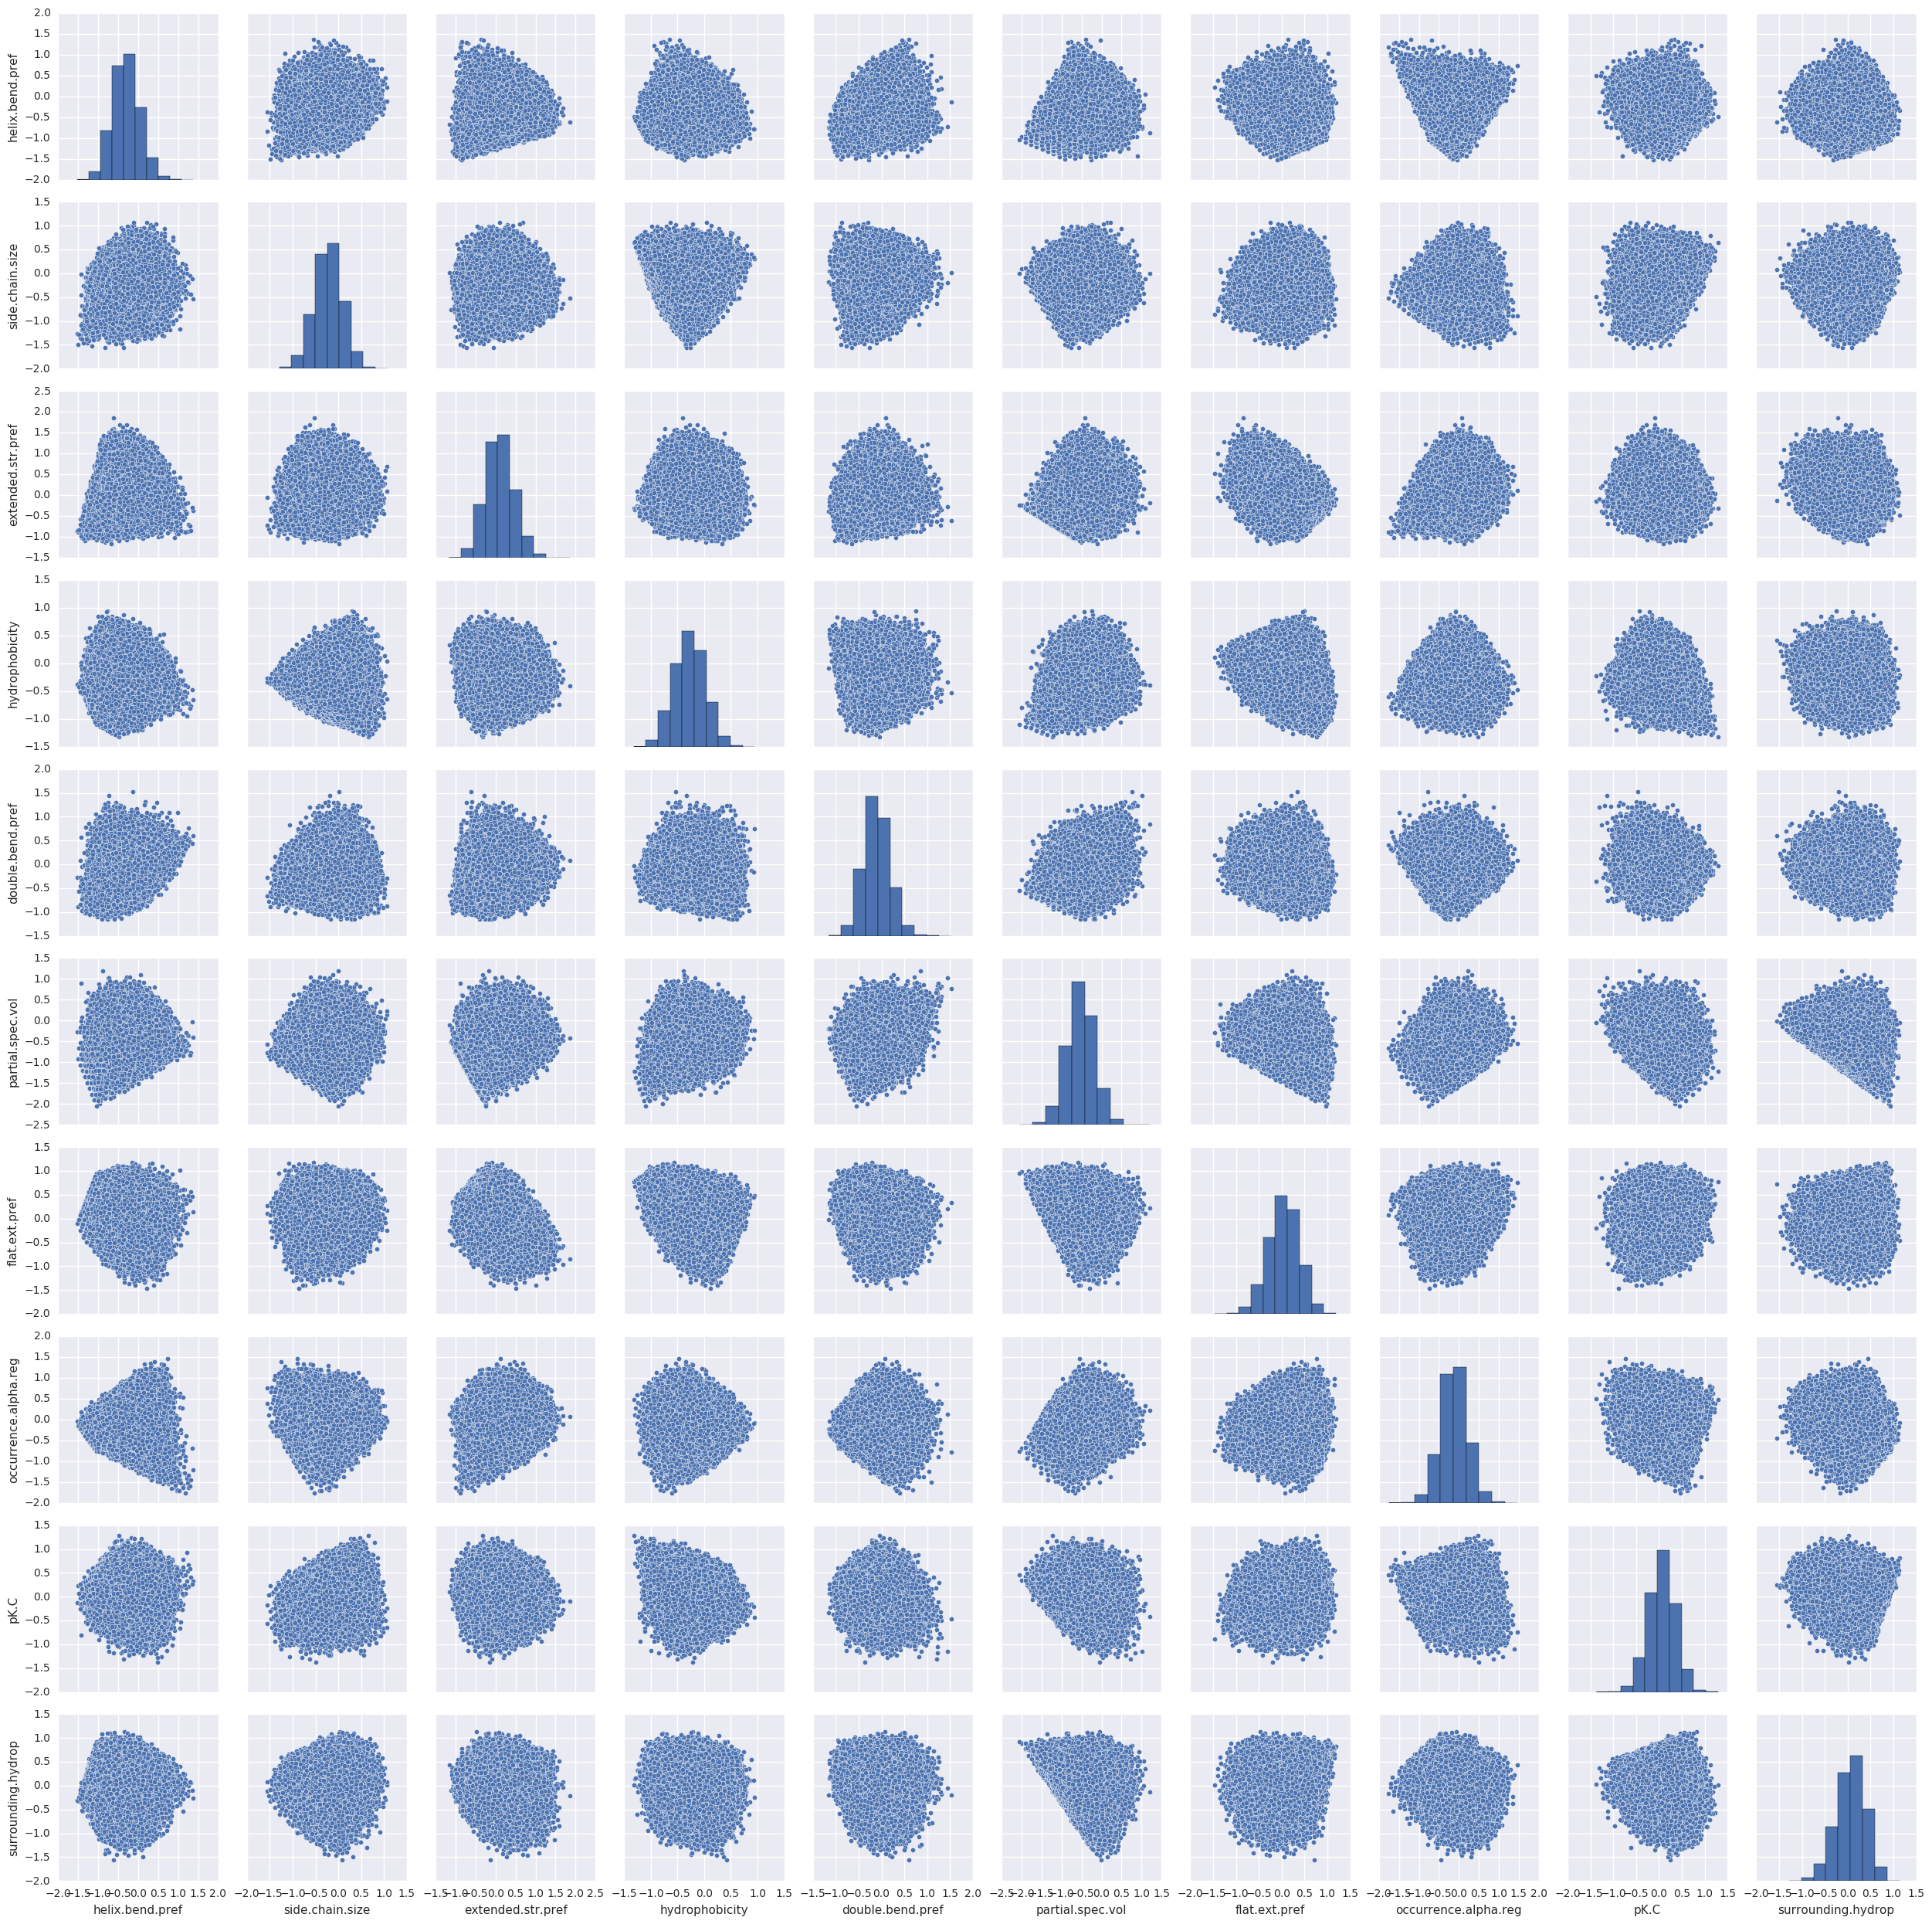

In [11]:
sns.pairplot(df2.drop('Peptide', axis=1))

In [12]:
df2.describe()

helix.bend.pref  side.chain.size  extended.str.pref  hydrophobicity  \
count    332404.000000    332404.000000      332404.000000   332404.000000   
mean         -0.300595        -0.219607           0.102133       -0.273447   
std           0.334486         0.305854           0.354786        0.291004   
min          -1.524444        -1.553333          -1.163333       -1.320000   
25%          -0.533333        -0.425556          -0.146667       -0.476667   
50%          -0.310000        -0.216667           0.091111       -0.271111   
75%          -0.077778        -0.011111           0.337778       -0.072222   
max           1.372222         1.067778           1.864444        0.945556   

       double.bend.pref  partial.spec.vol  flat.ext.pref  \
count     332404.000000     332404.000000  332404.000000   
mean          -0.104006         -0.524532       0.041780   
std            0.284052          0.347961       0.333240   
min           -1.152222         -2.050000      -1.468889   
25%           -0.301111         -0.754444      -0.181111   
50%           -0.116667         -0.525556       0.050000   
75%            0.080000         -0.294444       0.274444   
max            1.526667          1.201111       1.185556   

       occurrence.alpha.reg           pK.C  surrounding.hydrop  
count         332404.000000  332404.000000       332404.000000  
mean              -0.116603       0.060240            0.068903  
std                0.334620       0.288706            0.319834  
min               -1.754444      -1.370000           -1.552222  
25%               -0.340000      -0.130000           -0.138889  
50%               -0.118889       0.066667            0.088889  
75%                0.106667       0.257778            0.296667  
max                1.470000       1.290000            1.131111

In [13]:
df2.mean()

helix.bend.pref        -0.300595
side.chain.size        -0.219607
extended.str.pref       0.102133
hydrophobicity         -0.273447
double.bend.pref       -0.104006
partial.spec.vol       -0.524532
flat.ext.pref           0.041780
occurrence.alpha.reg   -0.116603
pK.C                    0.060240
surrounding.hydrop      0.068903
dtype: float64

Next I am going to plot mean values of aa properties for all alleles' binders

In [ ]:
# file_list = []
# for name in os.listdir("output/netMHCpan/"):
#     if "NMP" in name:
#         file_list.append(name)
# for i, s in enumerate(file_list):
#     file_list[i] = s.replace("_NMP_9mer_proc.txt", "")

Kidera Factors of human peptidome 9mers

In [3]:
pdf = pd.read_csv('output/kidera/hpeptides_9mers_kidera.csv')

In [5]:
pdf.columns

Index(['Peptide', 'helix.bend.pref', 'side.chain.size', 'extended.str.pref',
       'hydrophobicity', 'double.bend.pref', 'partial.spec.vol',
       'flat.ext.pref', 'occurrence.alpha.reg', 'pK.C', 'surrounding.hydrop'],
      dtype='object')

In [7]:
pdf.iloc[:,1:].columns

Index(['helix.bend.pref', 'side.chain.size', 'extended.str.pref',
       'hydrophobicity', 'double.bend.pref', 'partial.spec.vol',
       'flat.ext.pref', 'occurrence.alpha.reg', 'pK.C', 'surrounding.hydrop'],
      dtype='object')

In [9]:
pdf.iloc[:,1:].apply(shapiro, axis=0)

helix.bend.pref                            (1.0024296045303345, 1.0)
side.chain.size                            (1.0030887126922607, 1.0)
extended.str.pref                          (0.9915565252304077, 0.0)
hydrophobicity                             (1.0069342851638794, 1.0)
double.bend.pref                           (0.9959677457809448, 0.0)
partial.spec.vol          (0.9998509287834167, 7.20298796147461e-20)
flat.ext.pref           (0.9995747804641724, 2.5137538942731677e-33)
occurrence.alpha.reg                       (0.9958982467651367, 0.0)
pK.C                                       (0.9983937740325928, 0.0)
surrounding.hydrop                         (0.9958076477050781, 0.0)
dtype: object

In [4]:
idf1 = pd.read_csv('data/immunogenic_peptides.csv')
idf2 = pd.read_csv('data/immunogenic_peptides.txt', sep='\t')
idf2 = idf2[idf2['Species']=='Homo']
idf1.shape, idf2.shape

((9888, 7), (1114, 4))

In [5]:
idf1 = idf1[idf1['Length']==9]
idf2 = idf2[idf2['Peptide'].str.len()==9]
idf1.shape, idf2.shape

((5901, 7), (832, 4))

In [6]:
idf1 = idf1.drop(['Epitope Start', 'Epitope End', ' Epitope Source Organism Name', 'Length'], axis=1)
idf2 = idf2.drop(['Species'], axis=1)
idf1.columns = ['Peptide', 'MHC', 'Immunogenicity']
idf1 = idf1.reset_index(drop=True)
idf2 = idf2.reset_index(drop=True)
idf = pd.concat([idf1, idf2], axis=0)
idf.shape

(6733, 3)

In [47]:
idf.head()

Peptide          MHC Immunogenicity
0  KLEDLERDL  HLA-A*02:01       Positive
1  DLMGYIPLV  HLA-A*02:01       Positive
2  LITGRLQSL       HLA-A2       Positive
3  AVAKAGKPL  HLA-E*01:01       Positive
4  AMLQDIATL  HLA-E*01:01       Positive

In [7]:
idf.Immunogenicity = idf.Immunogenicity.map({'immunogenic': 1, 'non-immunogenic': 0,
                                             'Positive': 1, 'Negative': 0})

In [8]:
idf.Immunogenicity.value_counts()

1    4072
0    2661
Name: Immunogenicity, dtype: int64

In [9]:
idf1 = idf.Peptide.apply(lambda s: score_sequence(s))
idf = pd.concat([idf, idf1], axis=1)
idf.head()

Peptide          MHC  Immunogenicity         1         2         3  \
0  KLEDLERDL  HLA-A*02:01               1 -0.553333  0.225556 -0.662222   
1  DLMGYIPLV  HLA-A*02:01               1  0.058889 -0.191111  0.085556   
2  LITGRLQSL       HLA-A2               1 -0.174444 -0.265556  0.405556   
3  AVAKAGKPL  HLA-E*01:01               1 -0.402222 -0.707778 -0.327778   
4  AMLQDIATL  HLA-E*01:01               1 -0.773333 -0.444444 -0.150000   

          4         5         6         7         8         9        10  
0  0.470000 -0.696667 -0.690000  0.221111 -0.116667  0.213333  0.608889  
1 -0.528889  0.102222 -0.494444  0.007778  0.080000 -0.042222  0.267778  
2 -0.023333 -0.333333 -0.600000  0.386667 -0.312222 -0.108889  0.003333  
3  0.020000  0.135556 -1.000000  0.356667 -0.115556 -0.140000  0.168889  
4 -0.188889 -0.157778 -0.351111  0.056667 -0.272222  0.097778 -0.227778

In [10]:
idf = idf.drop('MHC', axis=1)

In [11]:
features = ["helix.bend.pref", "side.chain.size",\
        "extended.str.pref", "hydrophobicity", "double.bend.pref", "partial.spec.vol",\
        "flat.ext.pref", "occurrence.alpha.reg", "pK.C", "surrounding.hydrop"]

In [13]:
idf.columns = ['Peptide', 'Immunogenicity'] + features
idf.columns

Index(['Peptide', 'Immunogenicity', 'helix.bend.pref', 'side.chain.size',
       'extended.str.pref', 'hydrophobicity', 'double.bend.pref',
       'partial.spec.vol', 'flat.ext.pref', 'occurrence.alpha.reg', 'pK.C',
       'surrounding.hydrop'],
      dtype='object')

In [14]:
pdf['Immunogenicity'] = 2

In [15]:
pdf = pdf[['Peptide', 'Immunogenicity'] + features]
pdf.head()

Peptide  Immunogenicity  helix.bend.pref  side.chain.size  \
0  AAAAAAAAA               2        -1.560000        -1.670000   
1  AAAAAAAAC               2        -1.373333        -1.583333   
2  AAAAAAAAD               2        -1.322222        -1.508889   
3  AAAAAAAAE               2        -1.547778        -1.463333   
4  AAAAAAAAF               2        -1.410000        -1.375556   

   extended.str.pref  hydrophobicity  double.bend.pref  partial.spec.vol  \
0          -0.970000       -0.270000         -0.930000         -0.780000   
1          -0.812222       -0.356667         -0.905556         -0.425556   
2          -1.037778       -0.150000         -0.928889         -0.676667   
3          -1.041111       -0.110000         -0.972222         -0.648889   
4          -0.902222       -0.398889         -0.802222         -0.783333   

   flat.ext.pref  occurrence.alpha.reg      pK.C  surrounding.hydrop  
0      -0.200000             -0.080000  0.210000           -0.480000  
1      -0.008889             -0.147778  0.312222           -0.304444  
2      -0.346667             -0.018889  0.271111           -0.348889  
3      -0.173333             -0.028889  0.147778           -0.440000  
4      -0.103333              0.051111  0.376667           -0.475556

In [16]:
tdf = pd.concat([idf, pdf], axis=0)
tdf.head()

Peptide  Immunogenicity  helix.bend.pref  side.chain.size  \
0  KLEDLERDL               1        -0.553333         0.225556   
1  DLMGYIPLV               1         0.058889        -0.191111   
2  LITGRLQSL               1        -0.174444        -0.265556   
3  AVAKAGKPL               1        -0.402222        -0.707778   
4  AMLQDIATL               1        -0.773333        -0.444444   

   extended.str.pref  hydrophobicity  double.bend.pref  partial.spec.vol  \
0          -0.662222        0.470000         -0.696667         -0.690000   
1           0.085556       -0.528889          0.102222         -0.494444   
2           0.405556       -0.023333         -0.333333         -0.600000   
3          -0.327778        0.020000          0.135556         -1.000000   
4          -0.150000       -0.188889         -0.157778         -0.351111   

   flat.ext.pref  occurrence.alpha.reg      pK.C  surrounding.hydrop  
0       0.221111             -0.116667  0.213333            0.608889  
1       0.007778              0.080000 -0.042222            0.267778  
2       0.386667             -0.312222 -0.108889            0.003333  
3       0.356667             -0.115556 -0.140000            0.168889  
4       0.056667             -0.272222  0.097778           -0.227778

In [17]:
from sklearn.manifold import TSNE
from sklearn.cross_validation import train_test_split

In [18]:
tsne = TSNE(n_components=2, init='pca', random_state=1, method='barnes_hut', n_iter=200, verbose=20)

In [26]:
noself = tdf[(tdf['Immunogenicity']==0) | (tdf['Immunogenicity']==1)]
noself = noself.reset_index(drop=True)
noself.head()

Peptide  Immunogenicity  helix.bend.pref  side.chain.size  \
0  KLEDLERDL               1        -0.553333         0.225556   
1  DLMGYIPLV               1         0.058889        -0.191111   
2  LITGRLQSL               1        -0.174444        -0.265556   
3  AVAKAGKPL               1        -0.402222        -0.707778   
4  AMLQDIATL               1        -0.773333        -0.444444   

   extended.str.pref  hydrophobicity  double.bend.pref  partial.spec.vol  \
0          -0.662222        0.470000         -0.696667         -0.690000   
1           0.085556       -0.528889          0.102222         -0.494444   
2           0.405556       -0.023333         -0.333333         -0.600000   
3          -0.327778        0.020000          0.135556         -1.000000   
4          -0.150000       -0.188889         -0.157778         -0.351111   

   flat.ext.pref  occurrence.alpha.reg      pK.C  surrounding.hydrop  
0       0.221111             -0.116667  0.213333            0.608889  
1       0.007778              0.080000 -0.042222            0.267778  
2       0.386667             -0.312222 -0.108889            0.003333  
3       0.356667             -0.115556 -0.140000            0.168889  
4       0.056667             -0.272222  0.097778           -0.227778

In [21]:
self = tdf[tdf['Immunogenicity']==2].sample(10000)
self = self.reset_index(drop=True)
self.head()

Peptide  Immunogenicity  helix.bend.pref  side.chain.size  \
0  LRALRQRCS               2        -0.280000         0.045556   
1  QGADDVTSV               2         0.020000        -0.781111   
2  IHRVLDKIT               2        -0.325556         0.073333   
3  LGWFAKPVF               2        -0.031111         0.023333   
4  DSMKQTGVD               2         0.082222        -0.405556   

   extended.str.pref  hydrophobicity  double.bend.pref  partial.spec.vol  \
0           0.371111        0.401111         -0.772222         -0.103333   
1           0.128889        0.282222         -0.097778         -0.204444   
2           0.652222        0.250000         -0.077778         -0.287778   
3          -0.246667       -0.601111          0.091111         -0.763333   
4          -0.062222        0.464444          0.343333         -0.038889   

   flat.ext.pref  occurrence.alpha.reg      pK.C  surrounding.hydrop  
0       0.550000             -0.591111  0.214444            0.301111  
1      -0.541111              0.036667 -0.267778            0.034444  
2      -0.314444             -0.040000  0.265556            0.230000  
3       0.368889              0.111111 -0.008889            0.044444  
4      -0.243333              0.042222 -0.434444            0.112222

In [27]:
self.shape, noself.shape

((10000, 12), (6733, 12))

In [28]:
tsne_df = pd.concat([self, noself], axis=0)
tsne_df = tsne_df.reset_index(drop=True)
tsne_df.shape

(16733, 12)

In [29]:
X_tsne = tsne.fit_transform(tsne_df[features])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 16733
[t-SNE] Computed conditional probabilities for sample 2000 / 16733
[t-SNE] Computed conditional probabilities for sample 3000 / 16733
[t-SNE] Computed conditional probabilities for sample 4000 / 16733
[t-SNE] Computed conditional probabilities for sample 5000 / 16733
[t-SNE] Computed conditional probabilities for sample 6000 / 16733
[t-SNE] Computed conditional probabilities for sample 7000 / 16733
[t-SNE] Computed conditional probabilities for sample 8000 / 16733
[t-SNE] Computed conditional probabilities for sample 9000 / 16733
[t-SNE] Computed conditional probabilities for sample 10000 / 16733
[t-SNE] Computed conditional probabilities for sample 11000 / 16733
[t-SNE] Computed conditional probabilities for sample 12000 / 16733
[t-SNE] Computed conditional probabilities for sample 13000 / 16733
[t-SNE] Computed conditional probabilities 

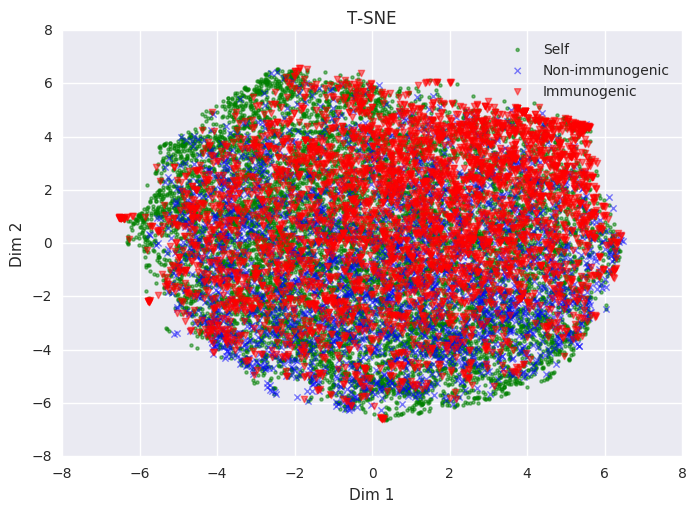

In [33]:
plt.figure()
plt.scatter(X_tsne[np.where(tsne_df.Immunogenicity == 2), 0],
                   X_tsne[np.where(tsne_df.Immunogenicity == 2), 1],
                   marker='.', color='g',
                   linewidth='1', alpha=0.5, label='Self')

plt.scatter(X_tsne[np.where(tsne_df.Immunogenicity == 0), 0],
                   X_tsne[np.where(tsne_df.Immunogenicity == 0), 1],
                   marker='x', color='b',
                   linewidth='1', alpha=0.5, label='Non-immunogenic')
plt.scatter(X_tsne[np.where(tsne_df.Immunogenicity == 1), 0],
                   X_tsne[np.where(tsne_df.Immunogenicity == 1), 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.5, label='Immunogenic')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
# plt.savefig('1.png')
plt.show()